In [2]:
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
csv_path = [
   "../../Raw_CSV/April 25-26 - 2022/Upwork/Upwork_Illustrator.csv",
   "../../Raw_CSV/April 27 - 2022/Upwork/Upwork-Illustrator.csv",
    "../../Raw_CSV/April 28 - 2022/Upwork/Freelance Illustrator Jobs - Upwork.csv", 
]
merge = pd.concat(map(pd.read_csv,csv_path),ignore_index=True)
merge["Skill"]= merge["Skill"].str.replace("^\['|'\]$","")
merge

/var/folders/tc/qdg72rpx523gjsqcr2vf_0c00000gn/T/ipykernel_5493/2966920936.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  merge["Skill"]= merge["Skill"].str.replace("^\['|'\]$","")


,Title,Description,Location,Skill,Est.Proj-Budget,Job Type,Contractor Tier,Duration,Title_URL,Job_type,Contractor_tier,Skill_one,Skill_two,skill_three,skill_four,skill_five,skill_six,s
0,"Leaders, dreamers and world shapers",I am writing a childrens book aged at children...,None,"[""Children's Book Illustration"", 'Freehand Dig...",None,Hourly,Intermediate,"1 to 3 months, Less than 30 hrs/week",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Need menu created,$35 for Punch Bowl 8 oz juice $50 for Super Bo...,None,Graphic Design,\n $15\n,Fixed-price,Intermediate,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Vectorise Six Logos for Laser Engraving (Light...,We have six logos of our clients.Most of these...,None,"Adobe Illustrator', 'Vector Tracing', 'LightBu...",\n $100\n,Fixed-price,Intermediate,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Illustrator design to improve product sticker,Modify an existing product sticker to fit with...,None,"Adobe Illustrator', 'Graphic Design', 'Label &...",None,Hourly: $8.00-$20.00,Entry level,"Less than 1 month, Less than 30 hrs/week",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Need logo and text put on 15 pictures for Inst...,I will provide you with 15 images along with 1...,None,Graphic Design,\n $30\n,Fixed-price,Intermediate,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
575,Concept Logo Design for New Artificial Turf Bu...,We are after a few different applicants to put...,NaN,NaN,NaN,NaN,NaN,NaN,https://www.upwork.com/job/Concept-Logo-Design...,Fixed-price,Expert,Logo Design,NaN,Graphic Design,Corporate Brand Identity,NaN,NaN,NaN
576,Experienced Graphic Designer with passion needed,I'm looking for a long-term relationship. I wi...,NaN,NaN,NaN,NaN,NaN,"More than 6 months, 30+ hrs/week",https://www.upwork.com/job/Experienced-Graphic...,Hourly: $20.00-$45.00,Expert,Graphic Design,NaN,NaN,NaN,NaN,NaN,NaN
577,Brand Creation & Logo Designs,We are a Trading company looking to create our...,NaN,NaN,NaN,NaN,NaN,NaN,https://www.upwork.com/job/Brand-Creation-amp-...,Fixed-price,Expert,Adobe Illustrator,Adobe Illustrator,Graphic Design,Corporate Brand Identity,Adobe Photoshop,Logo Design,Layout Design
578,Graphic Designer for AI Recruitment startup,Hirer.ai is an early stage startup focussing o...,NaN,NaN,NaN,NaN,NaN,"Less than 1 month, Less than 30 hrs/week",https://www.upwork.com/job/Graphic-Designer-fo...,Hourly: $10.00-$35.00,Expert,Adobe Illustrator,Adobe Illustrator,Illustration,Graphic Design,Adobe Photoshop,Packaging Design,Animation


In [4]:
merge["Est.Proj-Budget"] = merge["Est.Proj-Budget"].str.strip()

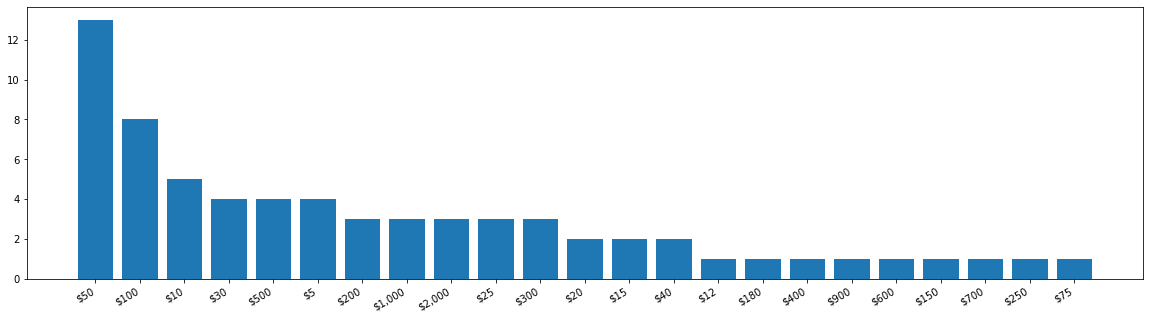

In [5]:
filt = (merge["Est.Proj-Budget"] != "None") & (merge["Est.Proj-Budget"].notna())
filter_est = merge.loc[filt]
count_est = filter_est["Est.Proj-Budget"].value_counts()
plt.figure(figsize=(20, 5))
plt.bar(count_est.index, count_est.values)
plt.xticks(rotation=30, ha="right")
plt.show()



In [6]:
filt_first_tier = merge["Contractor_tier"].fillna("")
# frame_first_tier =  merge.loc[filt_first_tier,"Contractor_tier"]
filt_second_tier = merge["Contractor Tier"].fillna("")
# frame_second_tier = merge.loc[filt_second_tier,"Contractor Tier"]

merge["CT"] = filt_first_tier + filt_second_tier


In [7]:
merge["CT"] = merge["CT"].str.strip()

In [8]:
count_tier = merge["CT"].value_counts()
count_tier

Intermediate    293
Expert          161
Entry level     126
Name: CT, dtype: int64

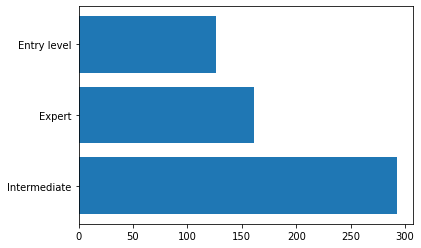

In [9]:
plt.barh(count_tier.index,count_tier.values)
plt.show()

In [10]:
merge["Combine Skills"] =   merge.Skill.fillna("") + " " + merge.Skill_one.fillna("") + "," + merge.Skill_two.fillna(",") + ", " + merge.skill_four.fillna(",") + ", " + merge.skill_three.fillna(",")

In [11]:
merge["Combine Skills"] = merge["Combine Skills"].str.replace("'", "")

In [12]:
merge["Combine Skills"] = merge["Combine Skills"].str.split(",")

In [13]:
skill_append = []
for i in range(len(merge["Combine Skills"])):
    count = merge["Combine Skills"][i]
    for j in range(len(count)):
        skill_append.append(count[j])

In [14]:
skill_without_space = []
filter_skill = list(filter(None, skill_append))
for i in filter_skill:
    if i != " ":
        skill_without_space.append(i)

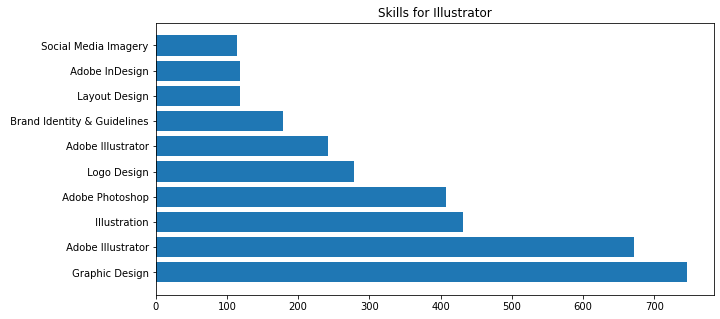

In [15]:
skill_frame = pd.DataFrame(skill_without_space, columns={"Skill"})
count_skill = skill_frame["Skill"].value_counts()[0:10]
plt.figure(figsize=(10,5))
plt.title("Skills for Illustrator")
plt.barh(count_skill.index,count_skill.values)
plt.show()

In [16]:
merge["JT"] = merge["Job Type"].fillna("") + merge["Job_type"].fillna("")

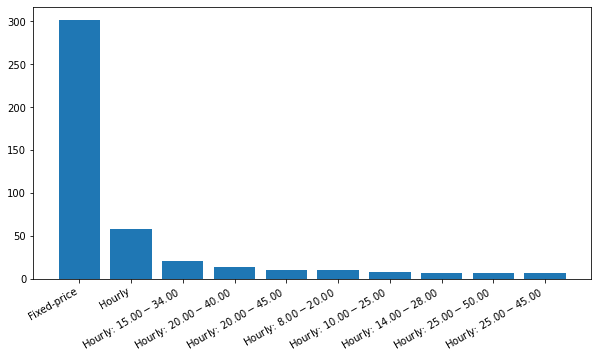

In [17]:
count_jt = merge["JT"].value_counts()[0:10]
plt.figure(figsize=(10,5))
plt.bar(count_jt.index, count_jt.values)
plt.xticks(rotation="30",ha="right")
plt.show()


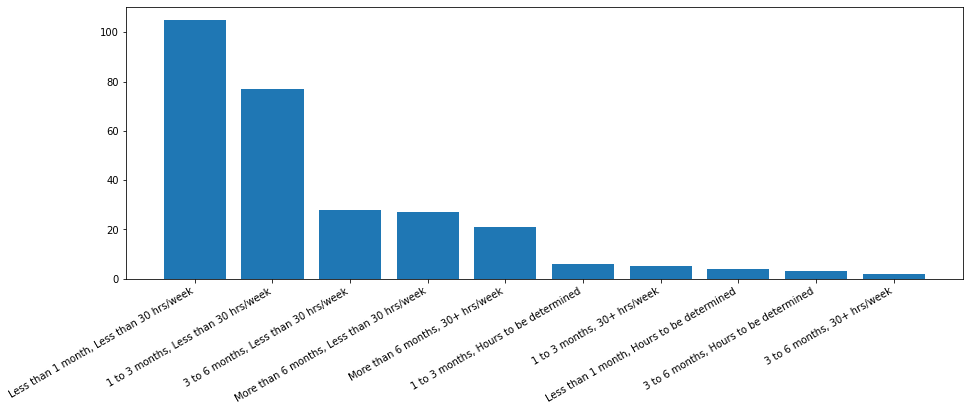

In [18]:
filt_loc = (merge["Duration"] != "None")
merge_duration = merge.loc[filt_loc,"Duration"]
count_duration = merge_duration.value_counts()
plt.figure(figsize=(15,5))
plt.bar(count_duration.index, count_duration.values)
plt.xticks(rotation="30",ha="right")
plt.show()

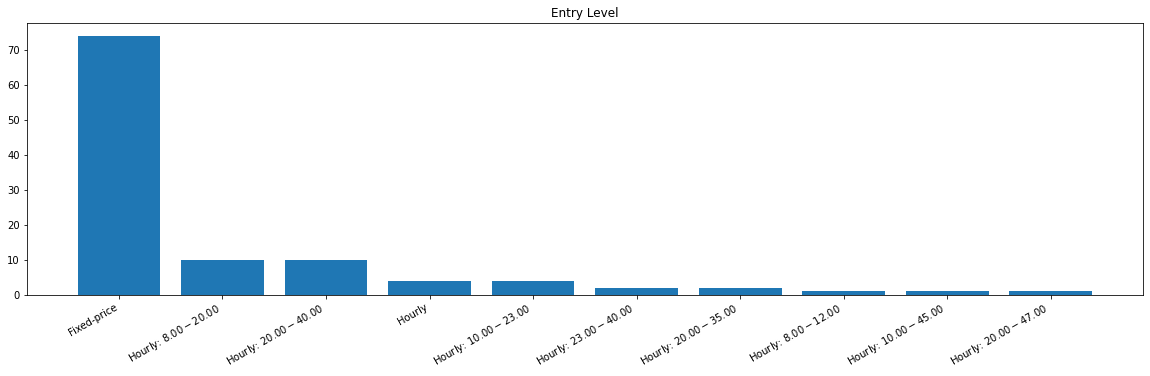

In [19]:
filt = (merge["CT"] == "Entry level")
count_entry_level = merge.loc[filt,"JT"].value_counts()[0:10]

plt.figure(figsize=(20,5))
plt.bar(count_entry_level.index, count_entry_level.values)
plt.title("Entry Level")
plt.xticks(rotation="30", ha="right")
plt.show()


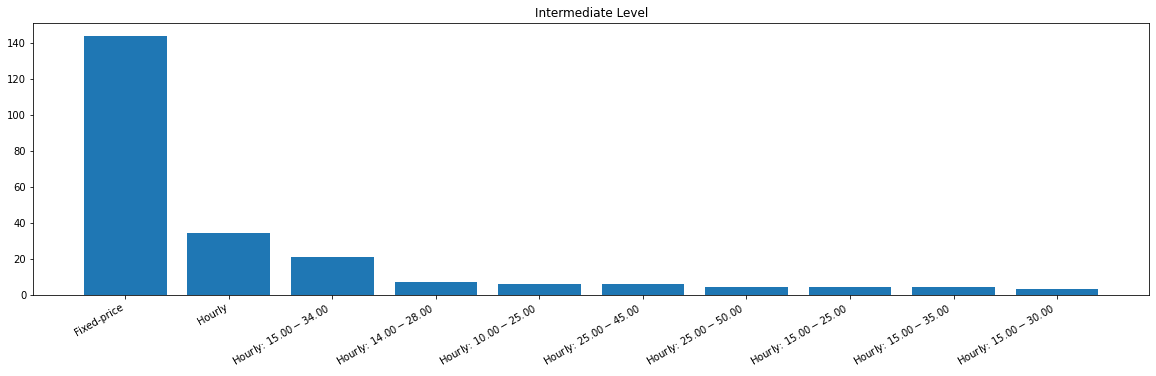

In [20]:
filt = (merge["CT"] == "Intermediate")
count_entry_level = merge.loc[filt,"JT"].value_counts()[0:10]

plt.figure(figsize=(20,5))
plt.bar(count_entry_level.index, count_entry_level.values)
plt.title("Intermediate Level")
plt.xticks(rotation="30", ha="right")
plt.show()

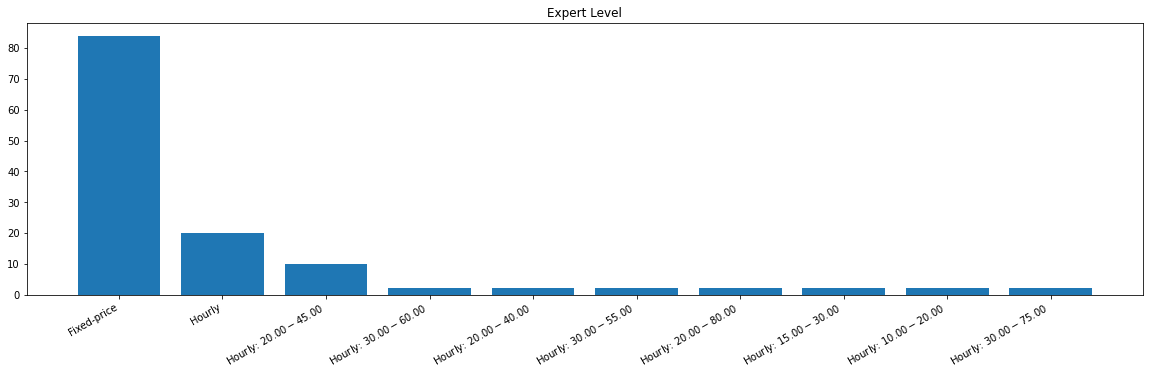

In [21]:
filt = (merge["CT"] == "Expert")
count_entry_level = merge.loc[filt,"JT"].value_counts()[0:10]

plt.figure(figsize=(20,5))
plt.bar(count_entry_level.index, count_entry_level.values)
plt.title("Expert Level")
plt.xticks(rotation="30", ha="right")
plt.show()

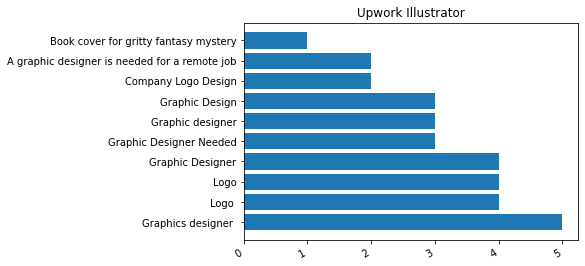

In [22]:
count_job_title = merge["Title"].value_counts()[0:10]
plt.barh(count_job_title.index, count_job_title.values)
plt.title("Upwork Illustrator")
plt.xticks(rotation="30",ha="right")
plt.show()